In [ ]:
import Levenshtein
import pandas as pd
from pathlib import Path

PDFBOT_CLEANED = Path("../PDFBoT/output/extracted_texts")
CLEANED_DIR = Path("../regex_cleaning/cleaned_papers")
GROUND_TRUTH_DIR = Path("../regex_cleaning/ground_truth")

df = pd.DataFrame(columns=["PDFBoT", "Regex"], dtype=float)

def get_file_number(filename):
    """Extracts the leading number from a filename (e.g., '1_cleaned.txt' → '1')"""
    return filename.stem.split('_')[0]

# Get all files and pair them by their leading numbers
matching_files = []
file_groups = {}

# Group files by their leading number
for dir_path, file_list in [(CLEANED_DIR, "cleaned"), 
                           (GROUND_TRUTH_DIR, "truth"),
                           (PDFBOT_CLEANED, "pdfbot")]:
    for file in dir_path.glob("*.txt"):
        num = get_file_number(file)
        if num not in file_groups:
            file_groups[num] = {}
        file_groups[num][file_list] = file

# Create pairs only when we have all three file types
for num, files in file_groups.items():
    if 'cleaned' in files and 'truth' in files and 'pdfbot' in files:
        matching_files.append((files['pdfbot'], files['cleaned'], files['truth']))

print(f"Found {len(matching_files)} valid file pairs")

for pdfbot_cleaned, auto_cleaned, ground_truth in matching_files:
    with open(pdfbot_cleaned) as f1, open(auto_cleaned) as f2, open(ground_truth) as f3:
        prefix = get_file_number(pdfbot_cleaned)
        #print(f"\nComparing files with prefix {prefix}:")
        
        pdfbot_text = f1.read()
        auto_text = f2.read()
        truth_text = f3.read()

        # Compare PDFBoT with ground truth
        similarity_pdfbot = Levenshtein.ratio(pdfbot_text, truth_text)
        #print(f"\nPDFBoT vs Ground Truth similarity: {similarity_pdfbot:.2%}")
        
        # Compare auto-cleaned with ground truth
        similarity_auto = Levenshtein.ratio(auto_text, truth_text)
        #print(f"Auto-cleaned vs Ground Truth similarity: {similarity_auto:.2%}")

        row = pd.Series({
            "PDFBoT": similarity_pdfbot,
            "Regex": similarity_auto
        }, name=prefix)

        df = pd.concat([df, row.to_frame().T])
df.index = df.index.astype(int)
df = df.sort_index()
df = df.round(4)


lev_df = df
lev_df

Found 20 valid file pairs


,PDFBoT,Regex
1,0.0688,0.9649
2,0.6607,0.9591
3,0.7264,0.8236
4,0.8019,0.9111
5,0.7094,0.8887
6,0.7957,0.9695
7,0.8273,0.8815
8,0.8905,0.8225
9,0.9223,0.9769
10,0.8251,0.8145


In [2]:
from pathlib import Path

PDFBOT_CLEANED = Path("../PDFBoT/output/extracted_texts_2")
CLEANED_DIR = Path("../regex_cleaning/cleaned_papers")
GROUND_TRUTH_DIR = Path("../regex_cleaning/ground_truth")

df = pd.DataFrame(columns=["PDFBoT", "Regex"], dtype=float)

def get_file_number(filename):
    """Extracts the leading number from a filename (e.g., '1_cleaned.txt' → '1')"""
    return filename.stem.split('_')[0]

def jaccard_similarity(text1, text2):
    """Calculate Jaccard similarity between two texts using word sets"""
    words1 = set(text1.lower().split())  # Case-insensitive comparison
    words2 = set(text2.lower().split())
    
    intersection = len(words1 & words2)
    union = len(words1 | words2)
    
    return intersection / union if union != 0 else 0 

# Group and match files
file_groups = {}
for dir_path, key in [(CLEANED_DIR, "cleaned"), 
                     (GROUND_TRUTH_DIR, "truth"),
                     (PDFBOT_CLEANED, "pdfbot")]:
    for file in dir_path.glob("*.txt"):
        num = get_file_number(file)
        file_groups.setdefault(num, {})[key] = file

# Process matching triplets
matching_files = [
    (files["pdfbot"], files["cleaned"], files["truth"])
    for files in file_groups.values()
    if {"pdfbot", "cleaned", "truth"}.issubset(files)
]

print(f"Found {len(matching_files)} valid file pairs")

for pdfbot_file, auto_file, truth_file in matching_files:
    with open(pdfbot_file) as f1, open(auto_file) as f2, open(truth_file) as f3:
        prefix = get_file_number(pdfbot_file)
        
        pdfbot_text = f1.read()
        auto_text = f2.read()
        truth_text = f3.read()

        # Calculate Jaccard similarities
        pdfbot_jaccard = jaccard_similarity(pdfbot_text, truth_text)
        auto_jaccard = jaccard_similarity(auto_text, truth_text)

        row = pd.Series({
            "PDFBoT": pdfbot_jaccard,
            "Regex": auto_jaccard
        }, name=prefix)

        df = pd.concat([df, row.to_frame().T])
df.index = df.index.astype(int)
df = df.sort_index()
df = df.round(4)
        
jac_df = df
jac_df    


Found 20 valid file pairs


,PDFBoT,Regex
1,0.0095,0.9615
2,0.5363,0.9513
3,0.4661,0.7628
4,0.6821,0.8711
5,0.6977,0.8272
6,0.6626,0.9649
7,0.7119,0.7474
8,0.8401,0.7678
9,0.8922,0.9618
10,0.8177,0.8216


In [3]:
print("Levanshtein Total Average")
lev_av = lev_df.mean()
print(lev_av)
print()

print("Jaccard Total Average")
jac_av = jac_df.mean()
print(jac_av)

Levanshtein Total Average
PDFBoT    0.60841
Regex     0.92245
dtype: float64

Jaccard Total Average
PDFBoT    0.536705
Regex     0.887620
dtype: float64


In [4]:
lev_above_40 = lev_df[lev_df["PDFBoT"] > 0.4]["PDFBoT"]
av = lev_above_40.mean()
av = av.round(4)*100
print(f"Levanshtein PDFBoT above 40%: {av}")

jacc_above_40 = jac_df[jac_df["PDFBoT"] > 0.4]["PDFBoT"]
ja = jacc_above_40.mean()
ja = ja.round(4)*100
print(f"Jaccard PDFBoT above 40%: {ja}")

Levanshtein PDFBoT above 40%: 80.43
Jaccard PDFBoT above 40%: 73.82


In [5]:
def create_histogram(df):
    # Create bins and labels
    bins = [i/100 for i in range(0, 101, 10)]  # [0.0, 0.1, ..., 1.0]
    labels = [f"{i*100:.0f}-{(i+0.1)*100:.0f}" for i in bins[:-1]]  # ['0-10', ..., '90-100']

    # Bin and count for Regex
    regex_bins = pd.cut(df["Regex"], bins=bins, labels=labels, include_lowest=True)
    regex_counts = regex_bins.value_counts().sort_index()

    # Bin and count for PDFBoT
    pdfbot_bins = pd.cut(df["PDFBoT"], bins=bins, labels=labels, include_lowest=True)
    pdfbot_counts = pdfbot_bins.value_counts().sort_index()


    hist_df = pd.DataFrame({
        "Regex": regex_counts,
        "PDFBoT": pdfbot_counts
    })

    return hist_df

lev = create_histogram(lev_df)
jac = create_histogram(jac_df)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_histograms(hist_df):
    labels = hist_df.index
    x = range(len(labels))

    # Use counts directly (absolute numbers)
    regex_counts = hist_df["Regex"]
    pdfbot_counts = hist_df["PDFBoT"]

    fig, axs = plt.subplots(2, 1, figsize=(4, 6), sharex=False)

    # Plot for Regex
    axs[0].bar(x, regex_counts, color='skyblue')
    axs[0].set_title("Regex vs Ground Truth")
    axs[0].set_ylabel("Number of Papers")
    axs[0].set_xlabel("Similarity Score (%)")
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(labels, rotation=90)
    axs[0].yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # Get the y-ticks from the Regex subplot
    y_ticks = axs[0].get_yticks()

    # Plot for PDFBoT
    axs[1].bar(x, pdfbot_counts, color='salmon')
    axs[1].set_title("PDFBoT vs Ground Truth")
    axs[1].set_xlabel("Similarity Score (%)")
    axs[1].set_ylabel("Number of Papers")
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(labels, rotation=90)
    axs[1].set_yticks(y_ticks)  # Set PDFBoT y-ticks same as Regex
    axs[1].yaxis.set_major_locator(mticker.FixedLocator(y_ticks))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


### Levanshtein Distance

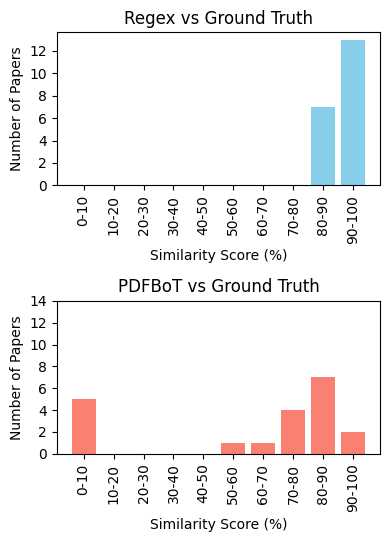

In [9]:
plot_histograms(lev)

### Jaccard Similarity

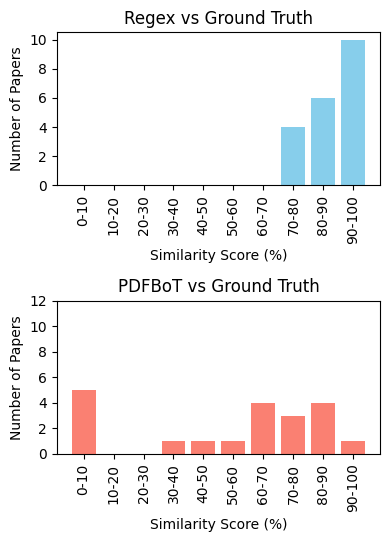

In [10]:
plot_histograms(jac)